In [1]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np

Grid Searches
=================

Grid-Search with build-in cross validation

In [2]:
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC

In [3]:
from sklearn.datasets import load_digits
from sklearn.cross_validation import train_test_split
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

Define parameter grid:

In [4]:
import numpy as np

param_grid = {'C': 10. ** np.arange(-3, 3),
              'gamma' : 10. ** np.arange(-5, 0)}

np.set_printoptions(suppress=True)
print(param_grid)

{'C': array([   0.001,    0.01 ,    0.1  ,    1.   ,   10.   ,  100.   ]), 'gamma': array([ 0.00001,  0.0001 ,  0.001  ,  0.01   ,  0.1    ])}


In [5]:
grid_search = GridSearchCV(SVC(), param_grid, verbose=3)

A GridSearchCV object behaves just like a normal classifier.

In [6]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] C=0.001, gamma=1e-05 ............................................
[CV] ................... C=0.001, gamma=1e-05, score=0.294248 -   0.2s
[CV] C=0.001, gamma=1e-05 ............................................
[CV] ................... C=0.001, gamma=1e-05, score=0.200445 -   0.2s
[CV] C=0.001, gamma=1e-05 ............................................
[CV] ................... C=0.001, gamma=1e-05, score=0.206278 -   0.2s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] .................. C=0.001, gamma=0.0001, score=0.294248 -   0.2s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] .................. C=0.001, gamma=0.0001, score=0.204900 -   0.2s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] .................. C=0.001, gamma=0.0001, score=0.208520 -   0.3s
[CV] C=0.001, gamma=0.001 ............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done  31 tasks       | elapsed:    6.5s
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   15.6s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([   0.001,    0.01 ,    0.1  ,    1.   ,   10.   ,  100.   ]), 'gamma': array([ 0.00001,  0.0001 ,  0.001  ,  0.01   ,  0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [7]:
grid_search.predict(X_test)

array([4, 6, 3, 0, 3, 0, 4, 3, 5, 9, 1, 6, 9, 6, 4, 2, 7, 4, 7, 9, 9, 0, 7,
       1, 6, 1, 4, 2, 2, 6, 4, 7, 8, 1, 5, 6, 2, 3, 8, 6, 8, 7, 4, 0, 9, 5,
       5, 4, 4, 1, 9, 6, 3, 8, 6, 5, 8, 8, 0, 0, 3, 2, 9, 3, 9, 3, 1, 5, 8,
       4, 2, 7, 8, 0, 0, 5, 5, 6, 8, 9, 4, 9, 2, 5, 3, 8, 4, 9, 4, 7, 0, 4,
       5, 7, 7, 3, 0, 0, 5, 3, 7, 1, 4, 2, 4, 4, 3, 8, 5, 5, 1, 9, 1, 3, 7,
       1, 4, 7, 1, 2, 0, 7, 0, 4, 2, 2, 5, 3, 0, 4, 1, 2, 2, 5, 5, 6, 0, 9,
       1, 1, 2, 5, 0, 7, 1, 4, 7, 7, 0, 7, 6, 6, 6, 8, 0, 6, 7, 3, 7, 9, 8,
       6, 7, 5, 6, 0, 9, 0, 0, 7, 4, 8, 4, 6, 1, 8, 5, 4, 7, 2, 6, 2, 6, 5,
       4, 4, 0, 0, 1, 3, 5, 3, 1, 0, 9, 1, 6, 8, 0, 3, 7, 5, 9, 8, 3, 1, 6,
       1, 8, 3, 2, 8, 0, 8, 8, 8, 3, 5, 4, 4, 4, 7, 2, 3, 7, 4, 0, 0, 8, 2,
       8, 9, 6, 1, 8, 9, 5, 5, 1, 5, 2, 2, 9, 0, 7, 9, 5, 9, 3, 7, 2, 9, 1,
       3, 7, 4, 3, 6, 9, 7, 5, 0, 6, 7, 1, 5, 6, 0, 2, 0, 9, 0, 4, 7, 2, 6,
       1, 6, 2, 9, 2, 1, 9, 8, 4, 8, 7, 7, 1, 0, 5, 6, 2, 9, 6, 7, 8, 4, 0,
       3, 5,

In [8]:
grid_search.score(X_test, y_test)

0.99555555555555553

In [9]:
grid_search.best_params_

{'C': 10.0, 'gamma': 0.001}

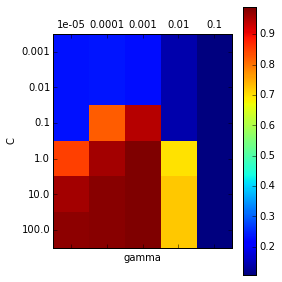

In [10]:
# We extract just the scores
%matplotlib inline
import matplotlib.pyplot as plt

scores = [x[1] for x in grid_search.grid_scores_]
scores = np.array(scores).reshape(6, 5)

plt.matshow(scores)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(5), param_grid['gamma'])
plt.yticks(np.arange(6), param_grid['C']);

# Randomized Search

(array([ 497.,  250.,  125.,   58.,   36.,   18.,    3.,    9.,    3.,    1.]),
 array([ 0.00121849,  0.6706528 ,  1.34008711,  2.00952142,  2.67895573,
         3.34839004,  4.01782436,  4.68725867,  5.35669298,  6.02612729,
         6.6955616 ]),
 <a list of 10 Patch objects>)

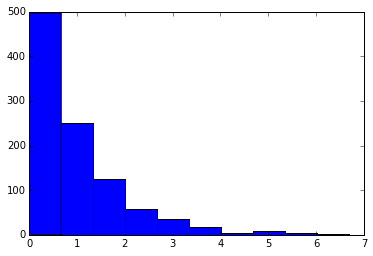

In [31]:
from sklearn.grid_search import RandomizedSearchCV
from scipy.stats import expon

plt.hist([expon.rvs() for x in xrange(1000)])

In [32]:

params = {'C': expon(), 'gamma': expon()}
rs = RandomizedSearchCV(SVC(), param_distributions=params, n_iter=50, verbose=3, random_state=0)

In [33]:
rs.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=2.89509461466, gamma=0.0404177276729 ..........................
[CV] . C=2.89509461466, gamma=0.0404177276729, score=0.172566 -   0.3s
[CV] C=2.89509461466, gamma=0.0404177276729 ..........................
[CV] . C=2.89509461466, gamma=0.0404177276729, score=0.175947 -   0.3s
[CV] C=2.89509461466, gamma=0.0404177276729 ..........................
[CV] . C=2.89509461466, gamma=0.0404177276729, score=0.147982 -   0.3s
[CV] C=0.608712614311, gamma=1.00816993766 ...........................
[CV] .. C=0.608712614311, gamma=1.00816993766, score=0.314159 -   0.2s
[CV] C=0.608712614311, gamma=1.00816993766 ...........................
[CV] .. C=0.608712614311, gamma=1.00816993766, score=0.207127 -   0.2s
[CV] C=0.608712614311, gamma=1.00816993766 ...........................
[CV] .. C=0.608712614311, gamma=1.00816993766, score=0.208520 -   0.2s
[CV] C=0.42099148494, gamma=0.708273207914 ...........................
[CV] .. C=0.420

[Parallel(n_jobs=1)]: Done  31 tasks       | elapsed:    6.7s
[Parallel(n_jobs=1)]: Done 127 tasks       | elapsed:   26.8s



[CV] C=0.926857342656, gamma=0.128943266739 ..........................
[CV] . C=0.926857342656, gamma=0.128943266739, score=0.104677 -   0.3s
[CV] C=0.926857342656, gamma=0.128943266739 ..........................
[CV] . C=0.926857342656, gamma=0.128943266739, score=0.107623 -   0.3s
[CV] C=0.368935919739, gamma=0.120456754904 ..........................
[CV] . C=0.368935919739, gamma=0.120456754904, score=0.110619 -   0.3s
[CV] C=0.368935919739, gamma=0.120456754904 ..........................
[CV] . C=0.368935919739, gamma=0.120456754904, score=0.104677 -   0.3s
[CV] C=0.368935919739, gamma=0.120456754904 ..........................
[CV] . C=0.368935919739, gamma=0.120456754904, score=0.107623 -   0.4s
[CV] C=3.6436142588, gamma=0.473443066346 ............................
[CV] ... C=3.6436142588, gamma=0.473443066346, score=0.110619 -   0.4s
[CV] C=3.6436142588, gamma=0.473443066346 ............................
[CV] ... C=3.6436142588, gamma=0.473443066346, score=0.104677 -   0.3s
[CV] 

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   35.9s finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params={}, iid=True, n_iter=50, n_jobs=1,
          param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f68eee77090>, 'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f68eeedbc10>},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          scoring=None, verbose=3)

In [25]:
rs.best_params_

{'C': 0.7372672568007005, 'gamma': 0.6335919791713512}

In [26]:
rs.best_score_

0.24350408314773572

In [27]:
scores, Cs, gammas = zip(*[(score.mean_validation_score, score.parameters['C'], score.parameters['gamma']) for score in rs.grid_scores_])

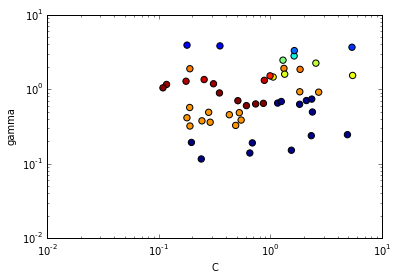

In [28]:
plt.xlabel("C")
plt.ylabel("gamma")
plt.yscale("log")
plt.xscale("log")
plt.scatter(Cs, gammas, s=40, c=scores)